### Exploratory Data Analysis ###

This notebook focuses on exploratory data analysis (EDA) of the 'metadata.csv' file and ultimately on analyzing the basic statistics of several .jpg images

In [5]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from PIL import Image
from tabulate import tabulate

c:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
path_to_metadatacsv = os.path.realpath('../data/metadata.csv') # The os.path.realpath() function is used to get the real path of the 'metadata.csv' file
print(path_to_metadatacsv)

D:\ProjectMLDataScience\human-age-detection\train\data\metadata.csv


In [7]:
# Open and read the CSV file (metadata.csv)

rows = [] 

with open(path_to_metadatacsv, 'r') as file:
    read_metadatacsv = csv.reader(file)
    column_names = next(read_metadatacsv)

    for row in read_metadatacsv:
        rows.append(row)

print("Column names:", column_names)

print("\nThe first few sample rows:\n")
for row in rows[:10]:
    print(row)

Column names: ['age', 'gender', 'path', 'face_score1']

The first few sample rows:

['68', 'male', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/01/nm0000001_rm946909184_1899-5-10_1968.jpg', '1.872117169344902']
['68', 'male', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/01/nm0000001_rm980463616_1899-5-10_1968.jpg', '1.1587657871914132']
['79', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm1346607872_1924-9-16_2004.jpg', '3.4791889134154426']
['79', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm1363385088_1924-9-16_2004.jpg', '3.87017062712482']
['49', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm221957120_1924-9-16_1974.jpg', '4.0964305784174595']
['82', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm2287049216_1924-9-16_2007.jpg', '3.482

In [8]:
# Load the CSV file into the DataFrame

df_metadata = pd.read_csv(path_to_metadatacsv)
df_metadata.head()

,age,gender,path,face_score1
0,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.872117
1,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.158766
2,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.479189
3,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.870171
4,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.096431


Now we will check the basic properties of our dataset

In [9]:
# Check the size of the set (number of rows, number of columns)

df_metadata.shape

(224840, 4)

In [10]:
# Check if there are empty cells in the entire DataFrame

check_if_NaN = df_metadata.isna().any().any()

if check_if_NaN:
    print("There are empty cells in the DataFrame.")
else:
    print("There are no empty cells in a DataFrame, that's good!")

There are no empty cells in a DataFrame, that's good!


In [11]:
# Calculate basic statistics of the dataset (numerical variables)

# count ---> Count number of non-NaN observations
# mean  ---> Mean of the values
# std   ---> Standard deviation of the observations
# min   ---> Minimum of the values in the object
# 25%   ---> Returns the 25th percentile: 25% means 25% of our data have that value or below
# 50%   ---> 50% means 50% of our data have that value or below
# 75%   ---> 75% means 75% of our data have that value or below
# max   ---> Maximum of the values in the object

descriptive_statistics = df_metadata.describe()
print(descriptive_statistics)

                 age    face_score1
count  224840.000000  224840.000000
mean       36.245437       3.115786
std        13.935485       1.345267
min       -39.000000       0.730919
25%        26.000000       2.007623
50%        34.000000       3.099542
75%        44.000000       4.173461
max       429.000000       7.381689


In the "metadata.csv" file we will check how many incorrect, impossible values have been entered for the age of women and men. We set the upper possible age limit in human life at 122 years, the lower one at 1, according to the oldest living person, article: 'https://en.wikipedia.or/wiki/List_of_the_verified_oldest_people'

In [12]:
# Let's check the highest and lowest value in the 'age' column

print("Highest value in the 'age' column:", max(df_metadata['age']))
print("Lowest value in the 'age' column:", min(df_metadata['age']))

Highest value in the 'age' column: 429
Lowest value in the 'age' column: -39


In [13]:
# So what rows are invalid in the 'age' column?

invalid_age_rows = df_metadata[(df_metadata['age'] > 122) | (df_metadata['age'] < 1)]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

invalid_age_rows[:6] # Display some sample rows

,age,gender,path,face_score1
8832,-12,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/70/nm0000170_rm1199744768_1975-12-17_1963.jpg,3.921587
8849,-12,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/70/nm0000170_rm1870833408_1975-12-17_1963.jpg,3.979509
14455,0,male,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/33/nm0000233_rm176606976_1963-3-27_1964.jpg,4.577354
14466,0,male,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/33/nm0000233_rm243715840_1963-3-27_1964.jpg,3.965564
14467,0,male,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/33/nm0000233_rm25612032_1963-3-27_1964.jpg,0.812937
14850,-6,female,D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop/35/nm0000235_rm243715840_1970-4-29_1964.jpg,3.965564


In [14]:
# And how many of them are there?

#len(invalid_age_rows) or
invalid_age_rows.info() # There are 263 invalid rows in the "metadata.csv" dataset!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 8832 to 224496
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          263 non-null    int64  
 1   gender       263 non-null    object 
 2   path         263 non-null    object 
 3   face_score1  263 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.3+ KB


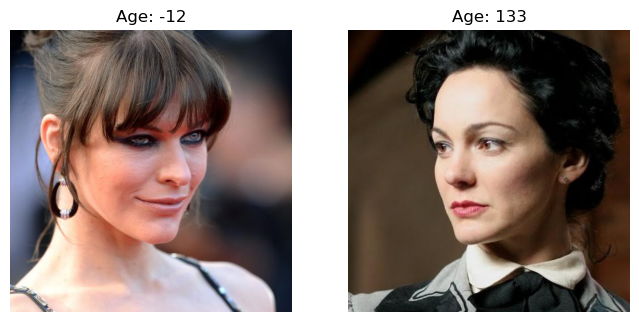

AgeError: Definitely, these ladies are not that age :D


In [15]:
### ERROR PREVIEW ---> impossible outliers ###

# We can look at some photos and see what someone who is -12 and 133 years old looks like :D

def get_selected_path(age, invalid_age_rows):
    """
    Function retrieves the file path based on the specified age from the DataFrame.

    Parameters:
    - age: The age for which we are seeking the file path.
    - invalid_age_rows: DataFrame containing information about files and their corresponding ages.

    Returns:
    - The file path for the given age if it exists, otherwise returns None.
    """
    selected_path = invalid_age_rows.loc[invalid_age_rows['age'] == age, 'path'].head(1).values
    return selected_path[0] if selected_path else None

selected_age_first = -12
selected_age_second = 133

selected_path_first = get_selected_path(selected_age_first, invalid_age_rows)
#print(selected_path_first)
selected_path_second = get_selected_path(selected_age_second, invalid_age_rows)
#print(selected_path_second)

img1 = Image.open(selected_path_first)
img2 = Image.open(selected_path_second)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img1)
axs[0].set_title(f'Age: {selected_age_first}')
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].set_title(f'Age: {selected_age_second}')
axs[1].axis('off')

plt.show()

print('AgeError: Definitely, these ladies are not that age :D')

In [16]:
# # Remove these rows from the original 'df_metadata' DataFrame -----> this is only after the whole EDA

# df_metadata_cleaned = df_metadata.drop(invalid_age_rows.index)
# df_metadata_cleaned # After correcting the irregularities, there are now 224577 rows (224840 - 263)

In [17]:
# Check if there are any values other than 'male' and 'female' in the 'gender' column

all_unique_gender = df_metadata['gender'].unique()
print(all_unique_gender)

['male' 'female']


In [18]:
descriptive_statistics = (df_metadata['gender']).describe()
print(descriptive_statistics)

count     224840
unique         2
top         male
freq      129729
Name: gender, dtype: object


In [19]:
# Count occurrences and calculate the ratio of female and male gender in the DataFrame

column_gender = 'gender'
value_counts = df_metadata[column_gender].value_counts()
ratio_counts = value_counts / len(df_metadata)

for value, count, ratio in zip(value_counts.index, value_counts, ratio_counts):
    print(f"Value: {value}, Number of appearances: {count}, Ratio: {ratio:.2%}")

Value: male, Number of appearances: 129729, Ratio: 57.70%
Value: female, Number of appearances: 95111, Ratio: 42.30%


In [20]:
# We can see how many faces there are between 100 and 122 years old

pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

people_between_100_and_122_age = df_metadata.query('100 <= age <= 122')
people_between_100_and_122_age

,age,gender,path,face_score1
55572,112,male,D:\ProjectMLDataScience\human-age-detection\tr...,4.058691
115833,118,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.241544
153634,105,female,D:\ProjectMLDataScience\human-age-detection\tr...,1.954850
183738,109,female,D:\ProjectMLDataScience\human-age-detection\tr...,1.764811
185157,111,male,D:\ProjectMLDataScience\human-age-detection\tr...,0.927151
185228,103,male,D:\ProjectMLDataScience\human-age-detection\tr...,3.848311
186409,113,male,D:\ProjectMLDataScience\human-age-detection\tr...,0.777204
186631,112,female,D:\ProjectMLDataScience\human-age-detection\tr...,2.818130
187554,102,male,D:\ProjectMLDataScience\human-age-detection\tr...,3.530178
190515,100,male,D:\ProjectMLDataScience\human-age-detection\tr...,3.446329


In [21]:
people_between_100_and_122_age.info() # 38 tagged faces between 100 and 122 years old

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 55572 to 224820
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          38 non-null     int64  
 1   gender       38 non-null     object 
 2   path         38 non-null     object 
 3   face_score1  38 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [22]:
# We can see all unique 'age' values in the entire set (list all age values without repeating them)

all_unique_age = df_metadata['age'].unique()
all_unique_age.sort()

print("Unique 'age' numbers:\n\n", all_unique_age)
print('\nSum of all unique values:', len(all_unique_age))

Unique 'age' numbers:

 [-39 -30 -26 -24 -20 -19 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6
  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 105 107 108 109 110 111 112 113 114 118 119 120 123 124 130 133 140
 149 151 156 184 186 209 211 249 256 268 429]

Sum of all unique values: 155


In [23]:
# We can also print values in the 'age' column that appear only once

value_counts_age = df_metadata['age'].value_counts()

values_occuring_once = value_counts_age[value_counts_age == 1].index.tolist()
sorted_values_occurring_once = sorted(values_occuring_once)

print("Values in the 'age' column that appear only once:\n\n", sorted_values_occurring_once)

Values in the 'age' column that appear only once:

 [-39, -30, -26, 105, 108, 111, 114, 120, 123, 130, 140, 149, 151, 156, 184, 186, 209, 211, 249, 256, 268, 429]


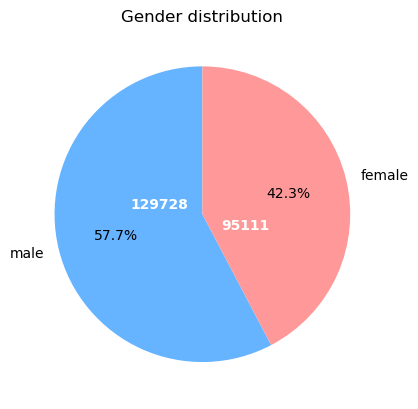

In [24]:
# Visualize the gender distribution using a pie chart with percentages and counts

colors = ['#66b3ff', '#ff9999']

gender_counts = df_metadata['gender'].value_counts()
pie_chart = gender_counts.plot.pie(colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Gender distribution')

plt.ylabel('')

# Add counts inside each wedge with an offset below the chart
for wedge in pie_chart.patches:
    angle = (wedge.theta2 - wedge.theta1)
    percentage = angle / 360.0
    count = int(percentage * len(df_metadata))

    # Offset to avoid overlapping, moving the text below the chart
    offset_x = wedge.center[0] + 0.3 * np.cos(np.radians((wedge.theta1 + wedge.theta2) / 2))
    offset_y = wedge.center[1] - 0.3 * np.sin(np.radians((wedge.theta1 + wedge.theta2) / 2))

    pie_chart.annotate(f"{count}",
                       (offset_x, offset_y),
                       ha='center', va='center', fontsize=10, color='white', weight='bold')

plt.show()

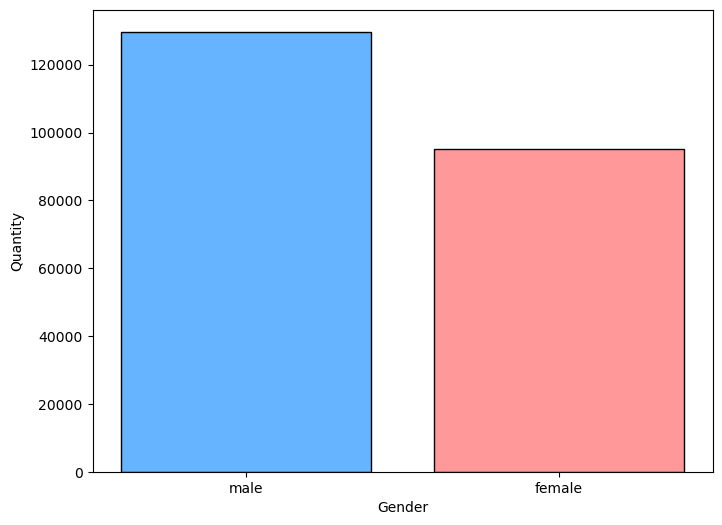

In [25]:
# Visualize gender distribution using a histogram

plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, df_metadata['gender'].value_counts(), color=colors, edgecolor='black')
#plt.xticks(rotation='0', ha='center')
plt.xlabel('Gender')
plt.ylabel('Quantity')

plt.show()

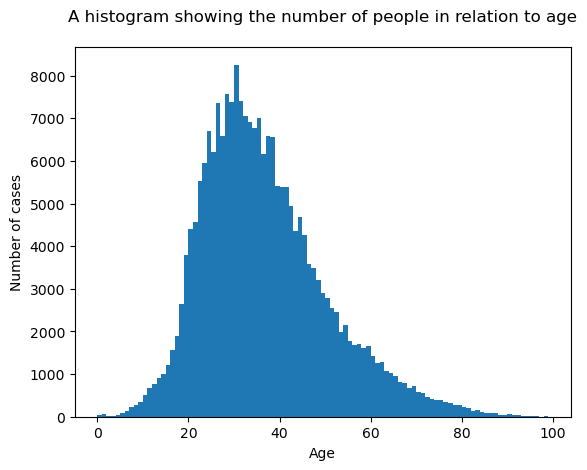

In [26]:
# Visualize age distribution using a histogram

plt.hist(df_metadata['age'], range(100))
plt.xlabel('Age')
plt.ylabel('Number of cases')
plt.title('A histogram showing the number of people in relation to age\n')
plt.show()

In [27]:
""""
We will perform the Shapiro-Wilk test to check whether the sample (the 'age' column) comes from a normal distribution.
---> Null hypothesis (H0): data come from a normal distribution
---> Alternative hypothesis (HA): the data do not come from a normal distribution
"""

statistic, p_value = stats.shapiro(df_metadata['age'])

alpha = 0.05 # In biological sciences, we assume a significance level of = 0.05 or less

if p_value > alpha:
    print(f'P-value: {p_value:.3f}. No grounds to reject H0. The data may come from a normal distribution.')
else:
    print(f'P-value: {p_value:.3f}. Accept HA (rejecting H0). The data does not come from a normal distribution.')


P-value: 0.000. Accept HA (rejecting H0). The data does not come from a normal distribution.


c:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [28]:
# Create an 'age category' column to illustrate and divide the number of faces with a given detected age into groups

df_metadata_with_agecategory = df_metadata[['age', 'gender', 'path', 'face_score1']]

bins = [1, 19, 39, 59, 79, 120] # Define age category boundaries
labels = ['1-19', '20-39', '40-59', '60-79', '80-120'] # Define labels for each age category
df_metadata_with_agecategory['age category'] = pd.cut(df_metadata_with_agecategory['age'], bins=bins, labels=labels, right=True) # Add a new column 'age category' to the DataFrame
pd.DataFrame(df_metadata_with_agecategory[:15])

,age,gender,path,face_score1,age category
0,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.872117,60-79
1,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.158766,60-79
2,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.479189,60-79
3,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.870171,60-79
4,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.096431,40-59
5,82,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.482030,80-120
6,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.865421,40-59
7,81,female,D:\ProjectMLDataScience\human-age-detection\tr...,5.414545,80-120
8,81,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.360469,80-120
9,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.559209,60-79


In [29]:
women_age = df_metadata_with_agecategory.loc[df_metadata_with_agecategory['gender'] == 'female', 'age']
men_age = df_metadata_with_agecategory.loc[df_metadata_with_agecategory['gender'] == 'male', 'age']

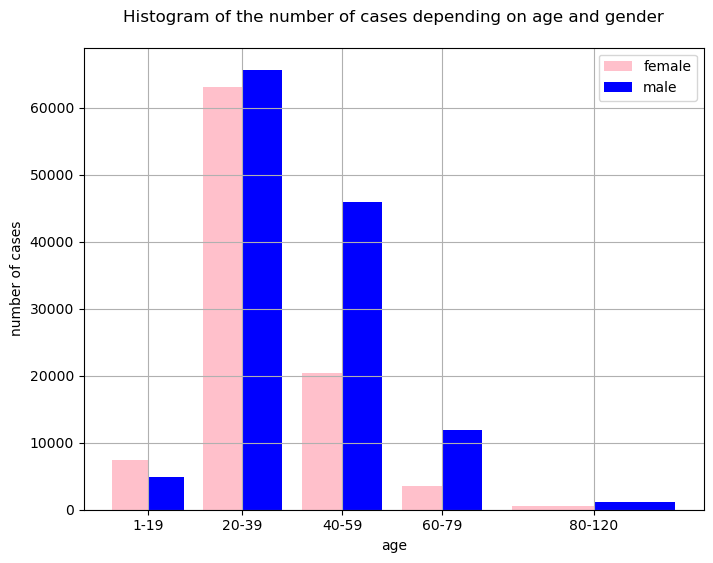

In [30]:
# Create a histogram of the number of cases depending on age and gender

plt.figure(figsize=(8, 6))
plt.hist([women_age, men_age], bins=bins, color=['pink', 'blue'], label=['female', 'male'])

bin_centers = 0.5 * np.diff(bins) + bins[:-1] # Use 'bin_centers' to get the center of each age range as a place for the label. This should correct the unevenness of the labels on the X axis
    
plt.xticks(bin_centers, labels)
plt.xlabel('age')
plt.ylabel('number of cases')
plt.title('Histogram of the number of cases depending on age and gender\n')
plt.legend()
plt.grid()
plt.show() # The age assigned to faces is dominated by people aged 20 to 39

In [31]:
# # Check the correctness of the chart. Compare values

# selected_rows = df_metadata_with_agecategory.loc[(df_metadata_with_agecategory['age category'] == '40-59') & (df_metadata_with_agecategory['gender'] == 'female')]
# selected_rows.info() # 9720 entries: good

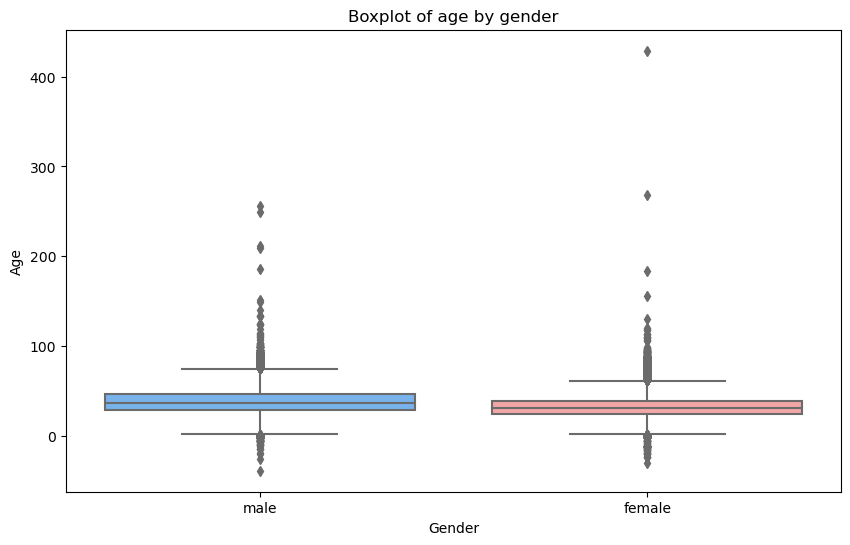

In [32]:
# Create a box plot of age by gender

# As we can deduce from the previous analysis, we see a lot of outliers in the 'metadata.csv' dataset

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df_metadata, palette=colors)
plt.title('Boxplot of age by gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

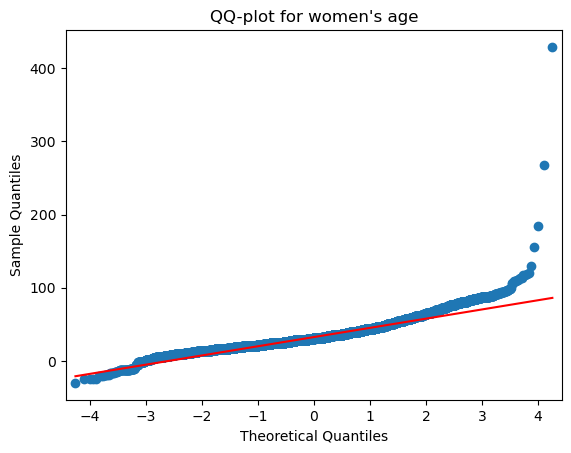

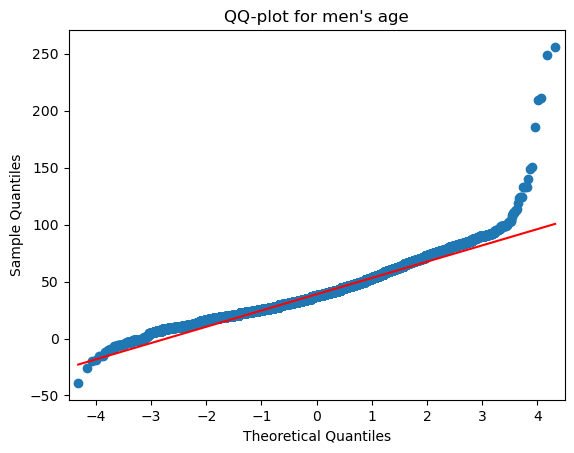

In [33]:
# Create a QQ-plot for women and men

# Quantile-Quantile plot draws the correlation between a given sample and the normal distribution

data_female = df_metadata[df_metadata['gender'] == 'female']['age']
data_male = df_metadata[df_metadata['gender'] == 'male']['age']

sm.qqplot(data_female, line='s')
plt.title("QQ-plot for women's age")
plt.show()

sm.qqplot(data_male, line='s')
plt.title("QQ-plot for men's age")
plt.show()

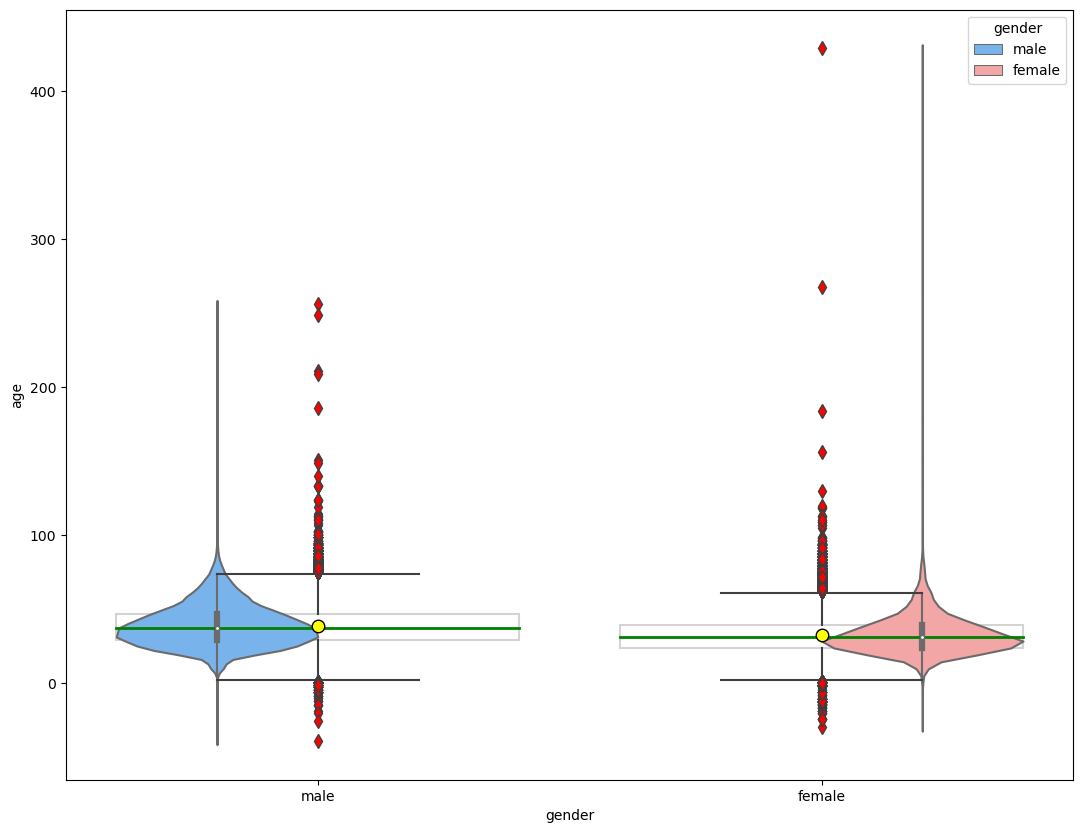

In [34]:
# Box plot combined with violin plot

fig, ax = plt.subplots(figsize=(13, 10))

sns.violinplot(x='gender', y='age', data=df_metadata, hue='gender', palette=colors)


sns.boxplot(x='gender', y='age', data=df_metadata, showmeans=True,
           boxprops=dict(facecolor='none', edgecolor='lightgrey'),
           meanprops=dict(marker='o', markerfacecolor='yellow', markeredgecolor='black', markersize=9),
           medianprops=dict(linewidth=2, color='green'),
           flierprops = dict(markerfacecolor='red', markersize=7, linestyle='none'))

plt.show()

In [35]:
# Calculate the values of skewness and kurtosis

# Skewness > 0: right-skewed asymmetry
# Kurtosis > 0: heavier tails than in a normal distribution (more "peaky" distribution)

skewness_male = stats.skew(data_male)
skewness_female = stats.skew(data_female)

kurtosis_male = stats.kurtosis(data_male)
kurtosis_female = stats.kurtosis(data_female)

print('Skewness value for the age distribution for women:', skewness_female, '\nSkewness value for the age distribution for men:', skewness_male)
print('\nKurtosis value for the age distribution for women:', kurtosis_female, '\nKurtosis value for the age distribution for men:', kurtosis_male)

Skewness value for the age distribution for women: 1.41769858324992 
Skewness value for the age distribution for men: 0.7393653052797579

Kurtosis value for the age distribution for women: 13.906531722096794 
Kurtosis value for the age distribution for men: 1.732015744475425


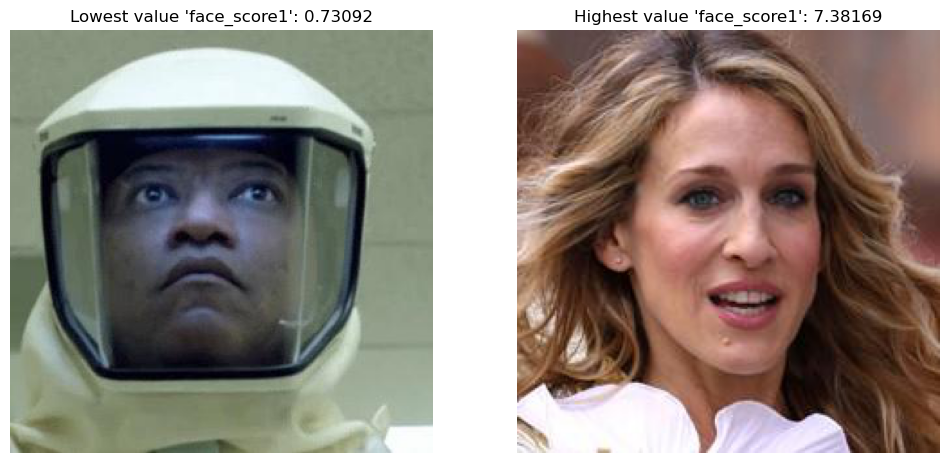

In [36]:
# Compare the two images with the lowest and highest values in the 'face_score1' column (face_score1 is detector score (the higher the better))
# ---> As you can see, the face in this image with the lowest value was the least recognized (probably due to the visible helmet)

# Find the indexes for the lowest and highest values in the 'face_score1' column
min_index = df_metadata['face_score1'].idxmin()
max_index = df_metadata['face_score1'].idxmax()

# Display the lowest value of face_score1 and the corresponding jpg file
min_image_path = df_metadata.loc[min_index, 'path']
min_image = Image.open(min_image_path)

# Display the highest value of face_score1 and the corresponding jpg file
max_image_path = df_metadata.loc[max_index, 'path']
max_image = Image.open(max_image_path)

min_score_rounded = round(df_metadata.loc[min_index, 'face_score1'], 5)
#print(min_score_rounded)
max_score_rounded = round(df_metadata.loc[max_index, 'face_score1'], 5)
#print(max_score_rounded)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(min_image)
axes[0].set_title(f"Lowest value 'face_score1': {min_score_rounded}")
axes[0].axis('off')

axes[1].imshow(max_image)
axes[1].set_title(f"Highest value 'face_score1': {max_score_rounded}")
axes[1].axis('off')

plt.show()

### We can also check some basic statistics about images - .jpg files ###

Reminder: `/train/data` (also 'DATA_DIR' (in 'consts.py')) is a default folder where data for model training should be put

```
├── data
│   ├── imdb_crop
│   │   ├── **
│   │   │  ├── **.jpg
│   │   ├── imdb.mat
│   ├── wiki_crop
│   │   ├── **
│   │   │  ├── **.jpg
│   │   ├── wiki.mat
```

In [37]:
path_to_jpg_files = os.path.realpath('../data')

def find_jpg_files(folder):
    """
    Function finds all JPG files within a specified folder and its subfolders.

    Parameters:
    - folder (str): The path to the folder to be searched for JPG files.

    Returns:
    - jpg_files (list): A list containing the full paths of all JPG files found.
    """
    jpg_files = []
    for root_folder, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(".jpg"):
                jpg_files.append(os.path.join(root_folder, file))
    return jpg_files

def get_image_statistics(image_path):
    """
    Function retrieves basic statistics from the image..

    Parameters:
    - image_path (str): The path to the image file.

    Returns:
    - dict or None: A dictionary containing image statistics, including path, format, mode,
      size, width, height. Returns None if there is an error processing the image.
    """
    try:
        with Image.open(image_path) as img:
            image_statistics = {
                "Path": image_path,
                "Format": img.format,
                "Mode": img.mode,
                "Size": img.size,
                "Width": img.width,
                "Height": img.height
            }
        return image_statistics
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

folder_to_search = path_to_jpg_files

jpg_files = find_jpg_files(folder_to_search)

if jpg_files:

    # Create an empty DataFrame to store the statistics
    columns = ["Path", "Format", "Mode", "Size", "Width", "Height"]
    df = pd.DataFrame(columns=columns)

    for i, file in enumerate(jpg_files):
        if i == 10:
            break  # Stop processing after the first 10 images

        statistics = get_image_statistics(file)
        if statistics:
            
            # Concatenate the statistics to the DataFrame
            df = pd.concat([df, pd.DataFrame([statistics])], ignore_index=True)

    print("\nDataFrame with image statistics (first 10 images):\n")
    print(tabulate(df.head(10), headers='keys', tablefmt='psql', showindex=False))
else:
    print("No JPG files found in the specified folder and its subfolders.")


DataFrame with image statistics (first 10 images):

+--------------------------------------------------------------------------------------------------------------+----------+--------+------------+---------+----------+
| Path                                                                                                         | Format   | Mode   | Size       |   Width |   Height |
|--------------------------------------------------------------------------------------------------------------+----------+--------+------------+---------+----------|
| D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop\00\nm0000100_rm1001569280_1955-1-6_2011.jpg | JPEG     | RGB    | (500, 500) |     500 |      500 |
| D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop\00\nm0000100_rm1002674432_1955-1-6_2003.jpg | JPEG     | RGB    | (171, 171) |     171 |      171 |
| D:\ProjectMLDataScience\human-age-detection\train\data\imdb_crop\00\nm0000100_rm1018346496_1955-1-6_2011.jpg |